## Starter Code

Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd


In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


In [7]:
data_info.columns

Index(['Description'], dtype='object')

In [8]:
feat_info( data_info.index[1])

The number of payments on the loan. Values are in months and can be either 36 or 60.


## Loading the data and other imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [10]:
df = pd.read_csv('lending_club_loan_two.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [12]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Project Tasks ##

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

## Section 1: Exploratory Data Analysis ##

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [13]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

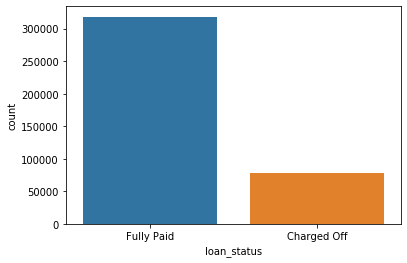

In [14]:
sns.countplot(x='loan_status', data=df)

**TASK: Create a histogram of the loan_amnt column.**

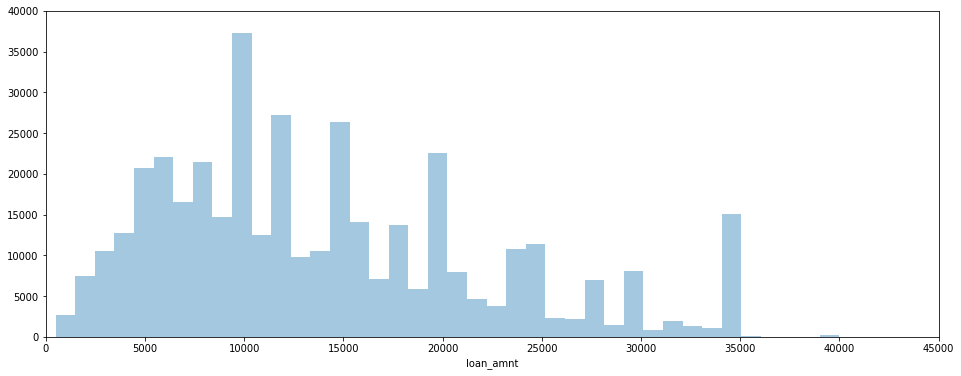

In [35]:
plt.figure(figsize=(16,6))
sns.distplot(df['loan_amnt'],bins=40,kde=False)
plt.ylim(0,40000)
plt.xlim(0,45000)
plt.show()

In [36]:
df['loan_amnt'].sort_values(ascending=False) #.sort_index(axis=1,ascending=False)

196708    40000.0
138501    40000.0
109976    40000.0
156469    40000.0
310192    40000.0
           ...   
19438       700.0
25312       500.0
355879      500.0
183896      500.0
97433       500.0
Name: loan_amnt, Length: 396030, dtype: float64

In [37]:
df1 = df['loan_amnt'].value_counts().sort_index().reset_index().reset_index(drop=True)
df1['loan_amnt'].sort_values(ascending=False)
df1

,index,loan_amnt
0,500.0,4
1,700.0,1
2,725.0,1
3,750.0,1
4,800.0,1
...,...,...
1392,39475.0,1
1393,39500.0,1
1394,39600.0,1
1395,39700.0,1


**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [38]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

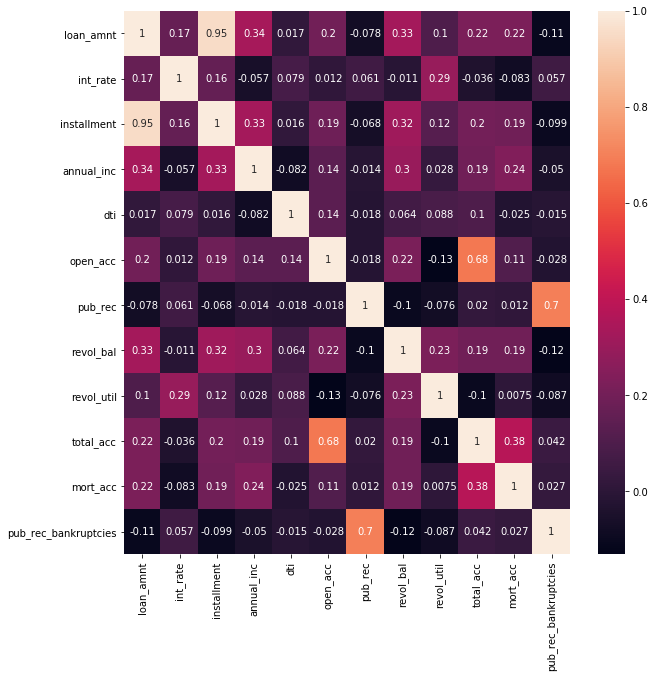

In [39]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [40]:
print(data_info.loc['installment']['Description'])

The monthly payment owed by the borrower if the loan originates.


In [41]:
print(data_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [ ]:
sns.scatterplot(x='installment',y='loan_amnt', data=df)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

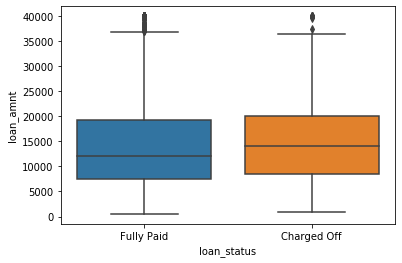

In [42]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [ ]:
df.groupby(['loan_status','loan_amnt']).describe()

**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [ ]:
df.head()

In [ ]:
print(df['grade'].unique())

In [ ]:
df['sub_grade'].unique()

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

In [ ]:
plt.figure(figsize=(12,6))
sg_df = df.sort_values(by='sub_grade')  
#print(sg_df)
sns.countplot(x='sub_grade',data=sg_df)

In [ ]:
plt.figure(figsize=(12,6)) 
sns.countplot(x='sub_grade',data=sg_df, hue='loan_status')   
plt.show()

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [ ]:
plt.figure(figsize=(12,6))
fg_df = df[ (df.grade == 'F') | (df.grade == 'G') ]  
fg_df = fg_df.sort_values(by=['sub_grade'], ascending=True)
#fg_df['loan_status']
sns.countplot(x='sub_grade',data=fg_df, hue='loan_status' )   
plt.show()

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [ ]:
df['loan_status'].unique()

In [ ]:
def loan_transform(status):
    if status=='Fully Paid':
        return 1
    else:
        return 0
    
df['loan_repaid'] = df['loan_status'].apply(loan_transform)

In [ ]:
lr_df = df[['loan_repaid','loan_status']]
lr_df

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. Helpful Link**

In [ ]:
 temp = df['loan_status'].apply(loan_transform)

In [ ]:
df.corr()

In [ ]:
ax =df.plot.bar(y='loan_amnt', rot=0)